In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
data = pd.read_csv('Social_Network_Ads2.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.7+ KB


In [34]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

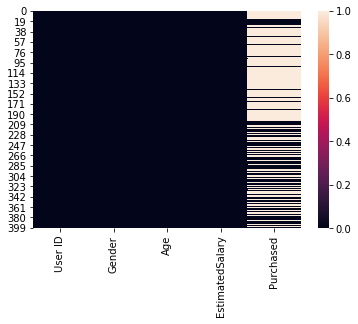

In [35]:
sns.heatmap(data==0)

In [36]:
data.drop('User ID',axis=1,inplace=True)

In [37]:
Male = pd.get_dummies(data['Gender'],drop_first=True)

In [38]:
data.drop('Gender',axis=1,inplace=True)


In [39]:
data = pd.concat([data,Male],axis=1)

In [40]:
#clean data
data.head()

,Age,EstimatedSalary,Purchased,Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1


C:\Users\Aldrin\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Aldrin\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


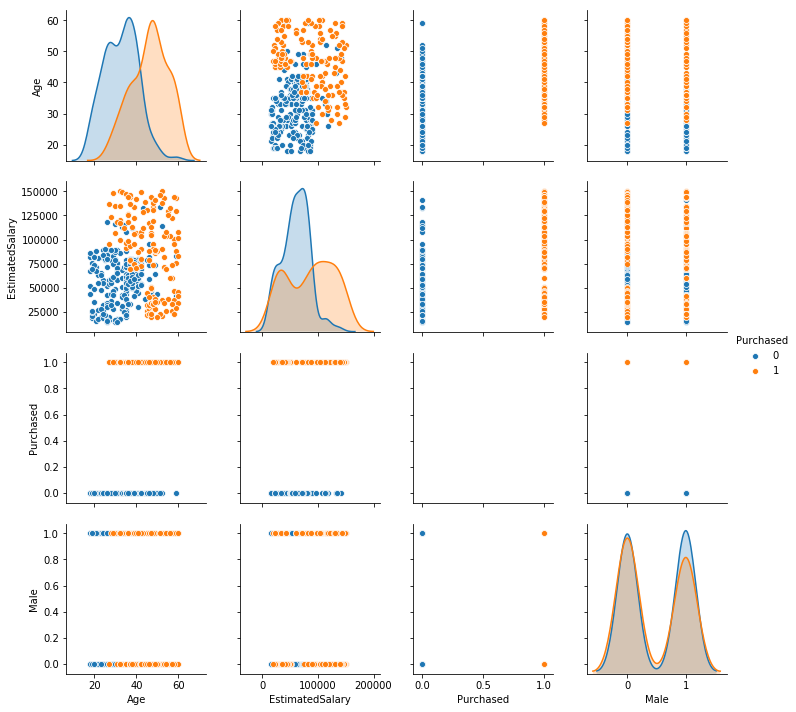

In [41]:
sns.pairplot(data, hue = "Purchased")

In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data.drop('Purchased',axis=1),data['Purchased'],test_size=0.33,random_state=101)

In [43]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

predicts = model.predict(X_test)

In [48]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(data[['Age','EstimatedSalary','Male']])
features

['Age', 'EstimatedSalary', 'Male']

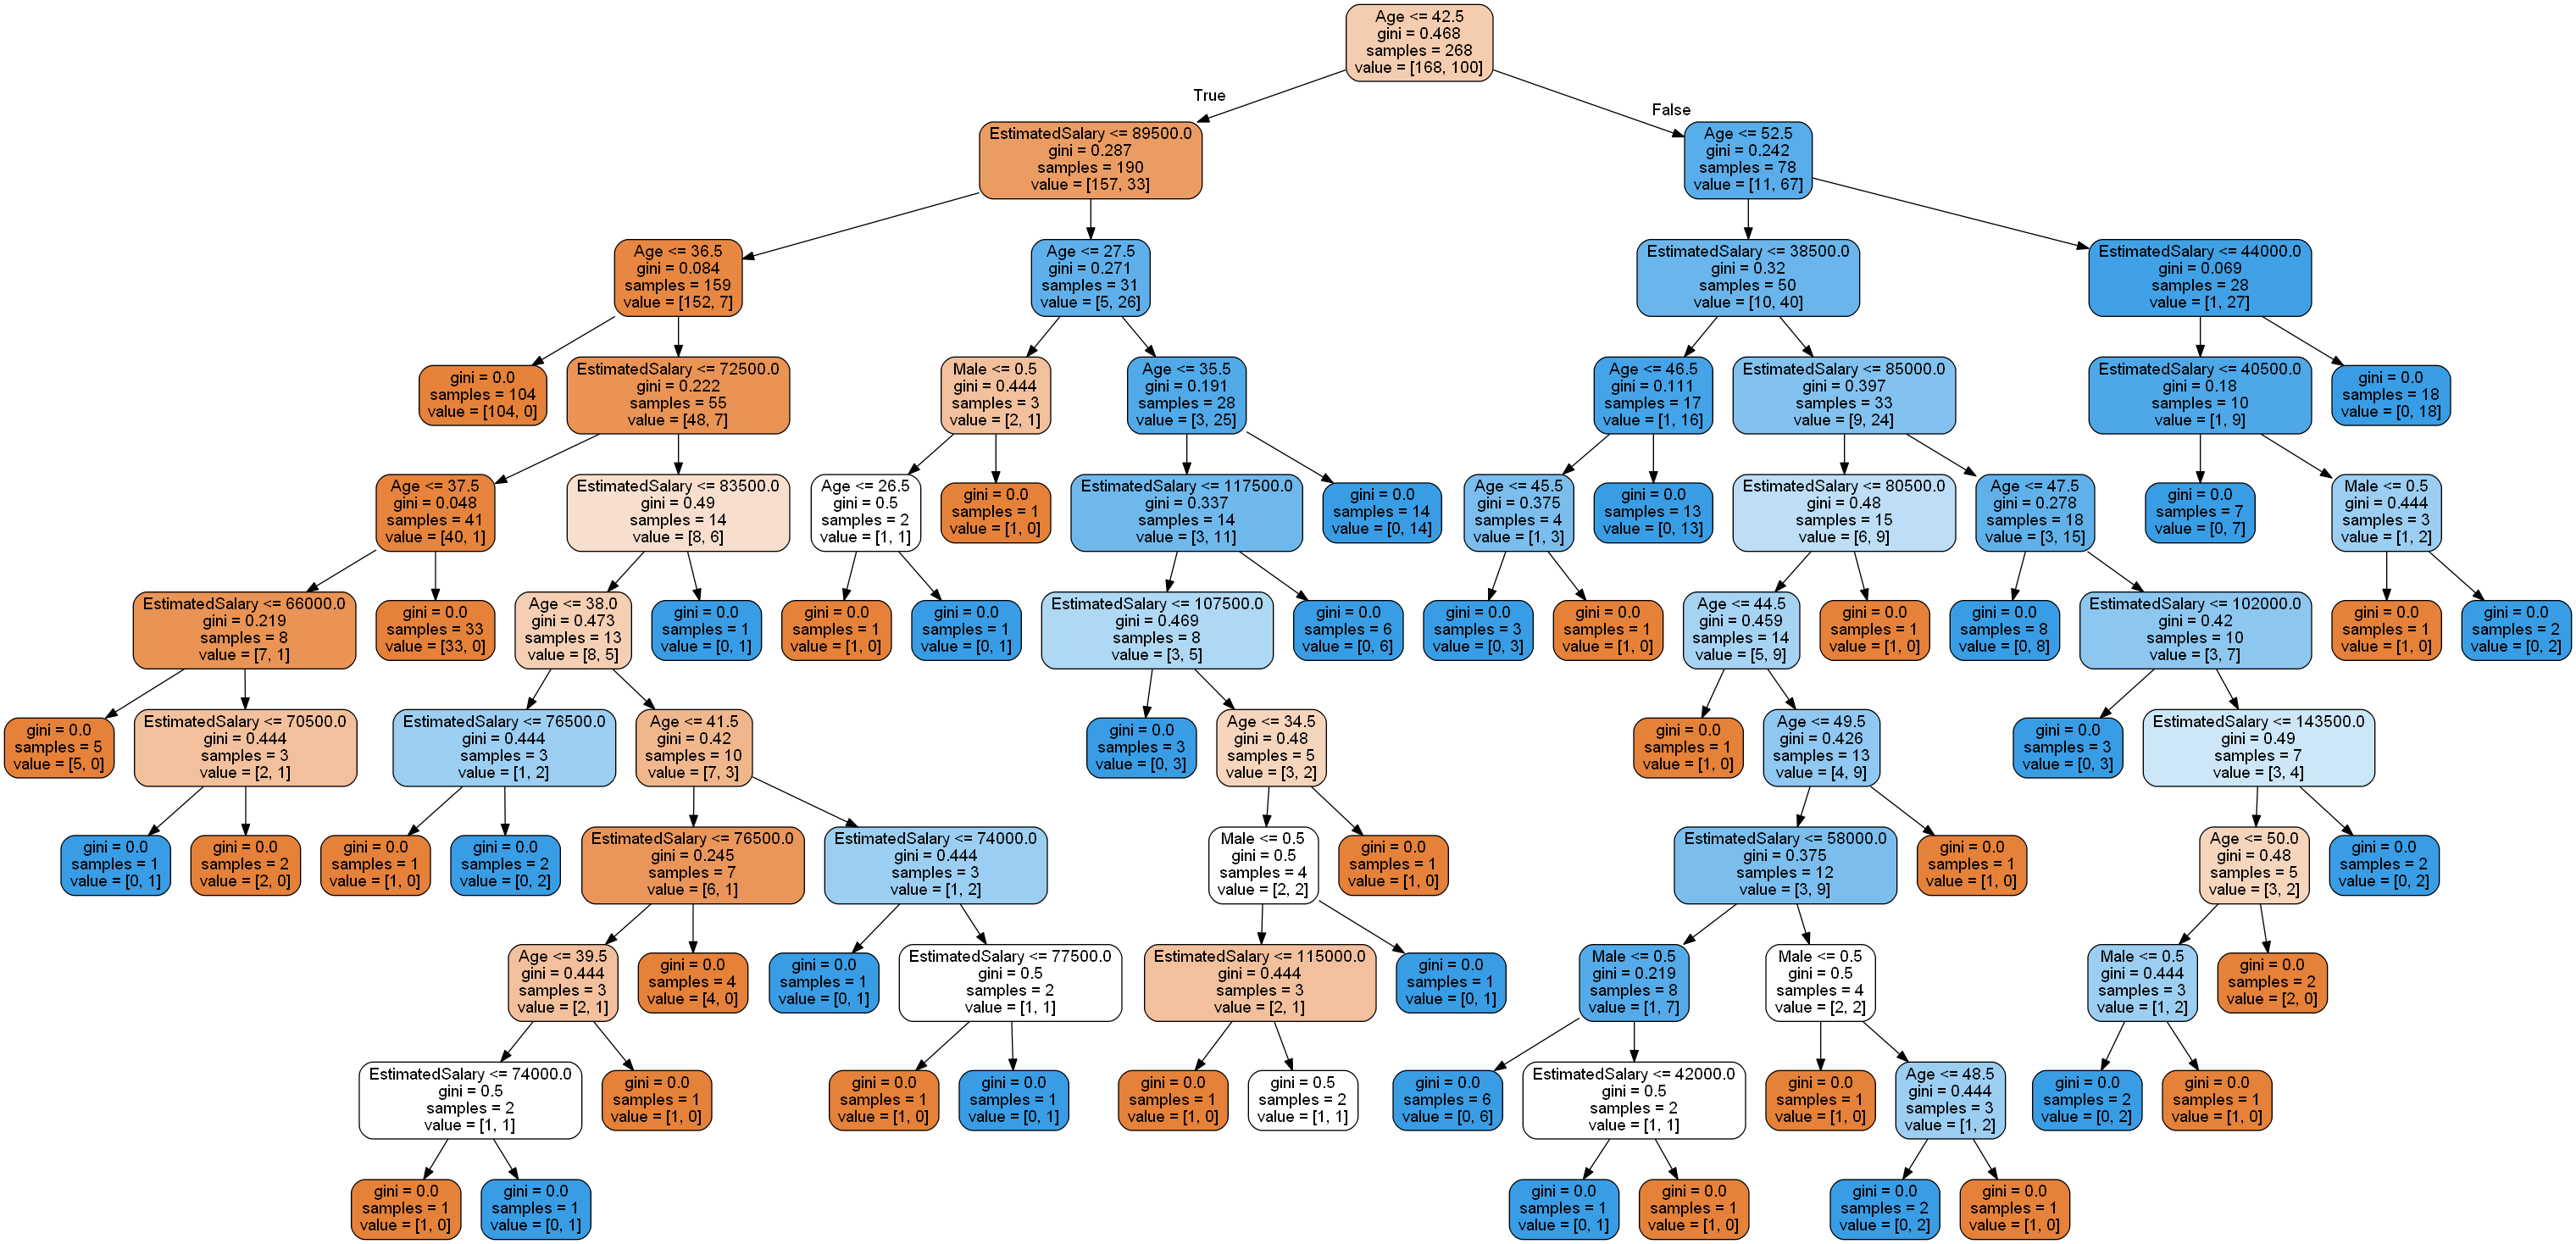

In [49]:
dot_data = StringIO()  
export_graphviz(model, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png()) 

In [50]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test,predicts))
print(classification_report(y_test,predicts))

[[75 14]
 [ 5 38]]
              precision    recall  f1-score   support

           0       0.94      0.84      0.89        89
           1       0.73      0.88      0.80        43

   micro avg       0.86      0.86      0.86       132
   macro avg       0.83      0.86      0.84       132
weighted avg       0.87      0.86      0.86       132



In [54]:
age = int(input("Enter Age: "))
salary = int(input("Enter Salary: "))
gender = int(input("Enter Gender: "))

print(model.predict([[age,salary,gender]]))

Enter Age: 55
Enter Salary: 70000
Enter Gender: 1
[1]
